# MAIS Fall 2019 Workshop 4 - Image Classification

In this notebook, we will be walking through the basics of image classification using `keras`.

1. First, we will go through installation and set-up of Python environment. We'll also take a look at the Cats and Dog dataset we will be working with.

2. Next, we will use the Keras library to train an image classifier on the Cats and Dog dataset.

3. Finally, we will see how we can improve on our image classifier by using a pre-trained model.

# 1) Installation and Set-up

## 1.1) Change Google Colab runtime to a GPU enabled instance

- Click "Connect to Runtime" in the top-right of the notebook.
- Click "Runtime" -> "Change Runtime Type" -> "Hardware Accelerator" -> "GPU"
- Save changes.


<img src="https://drive.google.com/uc?id=1jNDm0B-cTbk7hDnjZEgQbPRKL6L3MrNC">

## 1.2) Install TensorFlow with GPU enabled

In [0]:
# Install TensorFlow (which includes Keras)
!pip install tensorflow-gpu==2.0.0-beta1

## 1.3) Download the Cats and Dog dataset

In [1]:
# Download the dataset.
!wget -O cats_dog_dataset.tar.gz https://www.dropbox.com/s/1tbop84bk5mesmm/cats_dog_dataset.tar.gz?dl=0

--2019-11-19 22:39:32--  https://www.dropbox.com/s/1tbop84bk5mesmm/cats_dog_dataset.tar.gz?dl=0
Resolving www.dropbox.com (www.dropbox.com)... 162.125.82.1, 2620:100:6032:1::a27d:5201
Connecting to www.dropbox.com (www.dropbox.com)|162.125.82.1|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: /s/raw/1tbop84bk5mesmm/cats_dog_dataset.tar.gz [following]
--2019-11-19 22:39:32--  https://www.dropbox.com/s/raw/1tbop84bk5mesmm/cats_dog_dataset.tar.gz
Reusing existing connection to www.dropbox.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://uce08dba47bbee18490f7b94f8f8.dl.dropboxusercontent.com/cd/0/inline/Assm6fj8gk7GYcnEq3ekGFy9JNFpvC6uTsyTu8Pps0dozSaWaJTs_GDAeP6mRhC7dDhb2TdLdepsTKcH3cDs4mmlz0yw9exSBWOgILfgIqHbDQ/file# [following]
--2019-11-19 22:39:32--  https://uce08dba47bbee18490f7b94f8f8.dl.dropboxusercontent.com/cd/0/inline/Assm6fj8gk7GYcnEq3ekGFy9JNFpvC6uTsyTu8Pps0dozSaWaJTs_GDAeP6mRhC7dDhb2TdLdepsTKcH3cDs4mmlz0yw9e

In [2]:
# Extract the dataset.
!tar xzf cats_dog_dataset.tar.gz

# Examine the file structure of the dataset. You should see
# the 'training_dataset' and the 'validation_dataset' folders.
!ls

cats_dog_dataset.tar.gz  sample_data  training_dataset	validation_dataset


## 1.4) Preview a few images from the dataset




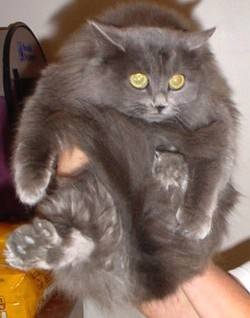

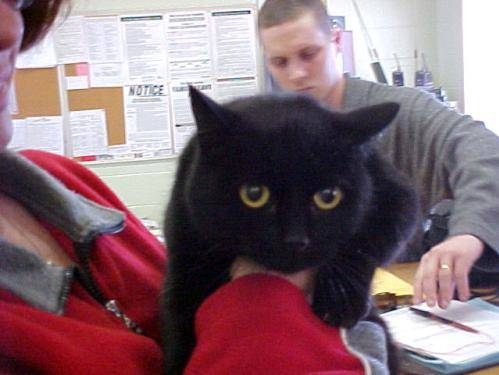

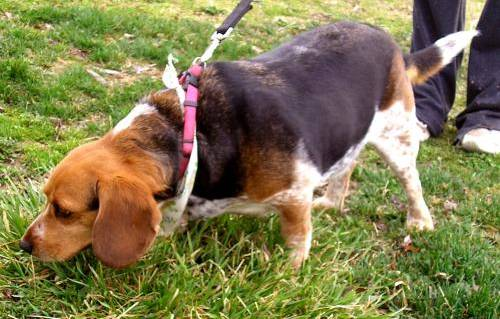

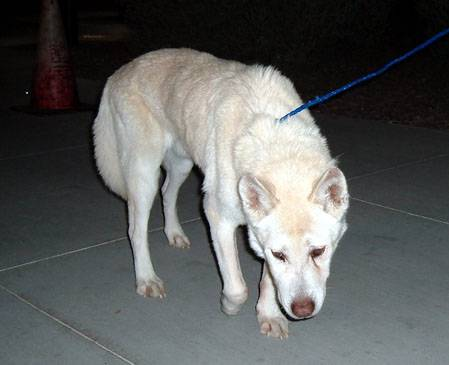

In [3]:
import glob
import matplotlib.pyplot as plt
from IPython.display import display, Image

# In general, it is good practice to familiarize yourself with the dataset
# before working with it. In this case, let's take a look at a few images
# from the dataset and make sure everything looks OK.

# Display the first few cats and dogs from the dataset.
sample_cat_images = glob.glob('training_dataset/cats/*.jpg')[:2]
sample_dog_images = glob.glob('training_dataset/dogs/*.jpg')[:2]

# Display cat images.
for file_path in sample_cat_images:
  display(Image(file_path))

# Display dog images.
for file_path in sample_dog_images:
  display(Image(file_path))

## 1.5) Define how the data should be loaded by Keras

In [0]:
import tensorflow
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Tell Keras where to find our dataset. Through the ImageDataGenerator class,
# Keras allows us to specify the location of the images, as well as any
# preprocessing we want computed on the images (e.g., resizing).
# Reference: https://keras.io/preprocessing/image/

# Training Data
train_datagen = ImageDataGenerator(rescale=1./255)
train_generator = train_datagen.flow_from_directory(
    directory=r"./training_dataset/",
    target_size=(96, 96),
    color_mode="rgb",
    batch_size=32,
    class_mode="binary",
    shuffle=True,
    seed=123123123
)

# Validation Data

#--- YOUR CODE HERE ---
#----------------------

In [0]:
# Debug: check that the GPU is properly detected. You should see that there is
# an XLA_GPU device attached to this colab instance.
from tensorflow.python.client import device_lib
print(device_lib.list_local_devices())

# 2) Training an Image Classifier

## 2.1) Import Keras and define the Image Classifier structure

In [0]:
import tensorflow as tf
from tensorflow.keras.models import Model, Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout

# Define the structure of the image classifier using Keras. The interface
# is designed to be very intuiitive -- if we want chain multiple network
# components together, we simply wrap them using the Sequential class.

# This is the feature extractor we've been talking about! It takes a
# 96x96 pixels image and outputs a 4096-dimensional vector.
feature_extractor = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(96, 96, 3)),
    Conv2D(32, (3, 3), activation='relu'),
    MaxPooling2D(pool_size=(2, 2)),

    Conv2D(64, (3, 3), activation='relu'),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D(pool_size=(2, 2)),

    Conv2D(64, (3, 3), activation='relu'),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D(pool_size=(2, 2)),
    Flatten(),
  ], name='feature_extractor')

# To complete the image classifier, we need to attach a classifier to our
# feature extractor. This segment takes a 4096-dimensional vector, and outputs
# the estimated probability that the image is a dog.
feature_classifier = Sequential([
    Dense(256, activation='relu'),
    Dropout(0.2),
    Dense(1, activation='sigmoid')
  ], name='feature_classifier')

# Attach the feature extractor to the classifier to compose the
# complete image classifier.

#--- YOUR CODE HERE ---
#----------------------

In [0]:
# Display a text summarization of the structure of our image classifier.
model.summary()

## 2.2) Train the model

In [0]:
# We need to tell Keras to 'compile' the image classifier we have defined. 
# Also, we will need to speficy the optimizer and loss functions
# for training; don't worry too much about these for now -- they specify
# how the weights of the model should be updated as the model is trained.
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

# Finally, we tell Keras to train our image classifier on the training data
# that we downloaded earlier. After each step the model is updated
# based on the predictions it made during training. Each epoch indicates
# one iteration through the entire training set; you should notice that
# the accuracy starts at 50% (random guessing) and gradually rises!
train_history = model.fit_generator(generator=train_generator, 
                                    validation_data=validation_generator, 
                                    epochs=10,
                                    use_multiprocessing=True,
                                    workers=6)

## 2.3) Visualize and interpret the results

In [0]:
import matplotlib.pyplot as plt
print('Available Metrics:', train_history.history.keys())

# Plot the training curves for accuracy and validation accuracy.
plt.plot(train_history.history['accuracy'])
plt.plot(train_history.history['val_accuracy'])

# Label our graph.
plt.title('Model Accuracy')
plt.ylabel('Accuracy (%)')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

# Plot the training curves for loss and validation loss.

#--- YOUR CODE HERE ---
#----------------------

# Label our graph.

#--- YOUR CODE HERE ---
#----------------------

In [0]:
import numpy as np
from keras.preprocessing import image

# Get the file-paths for the images we plotted above.
image_filepaths = sample_cat_images + sample_dog_images

# Load the images, resize them to 96x96 pixels and convert them into a NumPy array of shape (N, 96, 96, 3).

#--- YOUR CODE HERE ---
#----------------------

# Pass the images through the model and get the predictions.
predictions = model.predict(images)
print(predictions.squeeze())

# The correct output should be [0 0 1 1], i.e. [Cat, Cat, Dog, Dog].

# 3) Transfer Learning

## 3.1) Load the model pretrained on the STL10 dataset (excluding cats and dogs)

In [0]:
# Download the pretrained model.
!wget -O pretrained_model.h5 https://www.dropbox.com/s/o2cc6okymfa7ag5/pretrained_model.h5?dl=0

In [0]:
# Load the entire pretrained model and verify that its structure is the same as
# the previous mode we trained.
pretrained_model = tf.keras.models.load_model('./pretrained_model.h5')
pretrained_model.summary()

## 3.2) Augment our model with the pretrained models weights

In [0]:
# Recall that when applying transfer learning, we wish to re-use the
# feature extractor learned by the pretrained model.
#
# As such, our next step is to define a new model which only captures the
# feature extractor and not the feature classifier attached to it.
feature_extractor = pretrained_model.get_layer('feature_extractor')
feature_extractor.summary()

In [0]:
# Now that we have the pretrained feature extractor, we need to attach a 
# differente classifier on top. This is because the pretrained model was 
# structured to to predict 8 different classes, instead of just 2.
feature_classifier = Sequential([
  Dense(256, activation='relu'),
  Dropout(0.2),
  Dense(1, activation='sigmoid')
], name='feature_classifier')

# Same as in the first time we trained the model, we compose the
# feature extractor and classifier to complete the image classifier.

#--- YOUR CODE HERE ---
#----------------------
model.summary()

## 3.3) Train the augmented model on the Cats vs Dog dataset again

In [0]:
# Same as before, we tell Keras to compile our model before beginning training.
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

# Train the model.
train_history = model.fit_generator(generator=train_generator, 
                                    validation_data=validation_generator, 
                                    epochs=10,
                                    use_multiprocessing=True,
                                    workers=6)

# If everything goes well, you should notice that the model trains faster
# and converges to a better solution! In practice, this method is typically
# prefered to training models from scratch (as we did in the first part).

## 3.4) Visualize and interpret the new results

In [0]:
import matplotlib.pyplot as plt
print('Available Metrics:', train_history.history.keys())

# Plot the training curves for accuracy and validation accuracy.
plt.plot(train_history.history['accuracy'])
plt.plot(train_history.history['val_accuracy'])

# Label our graph.
plt.title('Model Accuracy')
plt.ylabel('Accuracy (%)')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

# Plot the training curves for loss and validation loss.

#--- YOUR CODE HERE ---
#----------------------

# Label our graph.

#--- YOUR CODE HERE ---
#----------------------

## Conclusion

You just completed the fourth MAIS workshop of Fall 2019! Thanks for attending the workshop. If you have any questions, feel free to ask any of the instructors.

To stay up-to-date on future events, you can sign up for our listserve on our [website](https://mcgillai.com/) and give our [Facebook page](https://www.facebook.com/McGillAI/) a like. Be on the lookout for the workshop slides and a feedback form for this workshop, they'll be posted in the Facebook Event!